In [1]:
import langgraph
from typing_extensions import TypedDict


class State(TypedDict):
    graph_state:str

In [10]:
def first_node(state):
    print("my first node is called")
    return {"graph_state":state['graph_state']+"I'm playing "}

def second_node(state):
    print("my second node is called")
    return {"graph_state":state['graph_state']+"Cricket"}

def third_node(state):
    print("my third node is called")
    return {"graph_state":state['graph_state']+"Basketball"}

In [11]:
import random
from typing import Literal

def decide_play(state)->Literal["second_node","third_node"]:
    graph_state=state['graph_state']

    if random.random()<0.5:
        return "second_node"
    
    return "third_node"

### GRAPH

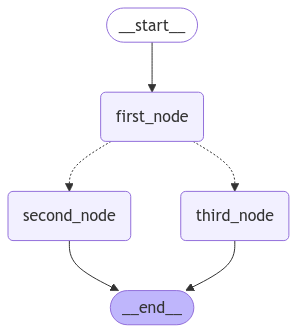

In [12]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder=StateGraph(State)

## adding node
builder.add_node("first_node",first_node)
builder.add_node("second_node",second_node)
builder.add_node("third_node",third_node)

## adding edges
builder.add_edge(START,"first_node")
builder.add_conditional_edges("first_node",decide_play)
builder.add_edge("second_node",END)
builder.add_edge("third_node",END)

## compile
graph=builder.compile()

## display
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
graph.invoke({"graph_state":"Hello, My name is Rahul, "})

my first node is called
my third node is called


{'graph_state': "Hello, My name is Rahul, I'm playing Basketball"}

### Basic Chatbot

In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

In [3]:
graph_builder=StateGraph(State)

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [5]:
from langchain_groq import ChatGroq

llm =ChatGroq(model="llama3-70b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x76d935eced50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x76d935ecfe00>, model_name='llama3-70b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
def chatbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

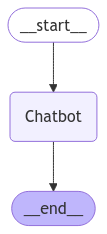

In [7]:
## adding node
graph_builder.add_node("Chatbot", chatbot)

## adding edges
graph_builder.add_edge(START,"Chatbot")
graph_builder.add_edge("Chatbot",END)

## compile
graph=graph_builder.compile()

## Display
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user","content":user_input}]}):
        for value in event.values():
            print("Assistant:", value['messages'][-1].content)

In [9]:
while True:
    try:
        user_input=input("User: ")
        if user_input.lower() in ["quit","exit","q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    
    except:
        ## fallback if input() is not available
        user_input = "What do you know about Langgraph?"
        print("User: "+ user_input)
        stream_graph_updates(user_input)
        break

Assistant: Samay Raina is a popular Indian social media influencer and content creator!

From what I could gather, Samay Raina primarily creates content on YouTube and Instagram, where she has a massive following. Her content revolves around lifestyle, fashion, beauty, travel, and relationships. She is known for her relatable and engaging videos, which have earned her a huge fan base, especially among the younger generation.

Samay Raina's Instagram account has over 3.5 million followers, and her YouTube channel has garnered over 2.5 million subscribers. She regularly posts about her daily life, fashion hauls, product reviews, and shares her personal experiences, making her followers feel connected to her.

What would you like to know more about Samay Raina? Her personal life, her content, or something else?
Goodbye!
